In [1]:
using Pkg
Pkg.activate("../")

using Plots

using Revise
using MarkovModels

 Activating environment at `~/GithubRepositories/MarkovModels/Project.toml`
┌ Info: Precompiling MarkovModels [c2ae6250-d0a1-11ea-0991-234599ce5244]
└ @ Base loading.jl:1278


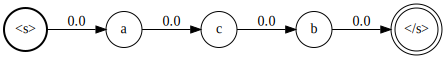

In [2]:
fsm = LinearFSM(["a", "c", "b"])

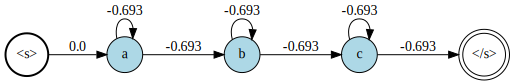

In [3]:
emissionsmap = Dict(
    "a" => 1,
    "b" => 2,
    "c" => 3
)

fsm = LinearFSM(["a", "b", "c"], emissionsmap)
for state in states(fsm)
    (isinit(state) || isfinal(state)) && continue
    link!(state, state)
end
fsm = fsm |> weightnormalize

In [4]:
D,N = length(emissionsmap), 10 # number of distributions times number of frames
llh = randn(D, N)

3×10 Array{Float64,2}:
 -0.726597   0.850559  0.778639  …  -1.33577    0.623323   0.0879946
 -0.934455   0.81332   0.1689        0.0960641  0.132555   2.20471
 -1.30834   -1.56732   1.4237        0.935733   1.04669   -0.324993

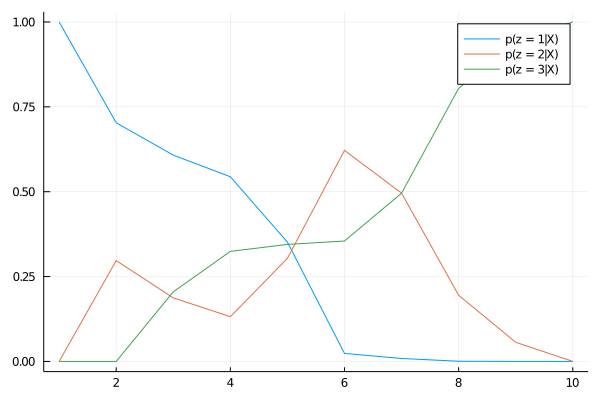

In [5]:
lnαβ, ttl = αβrecursion(fsm, llh);
γ = resps(fsm, lnαβ)

p = plot()
plot!(p, γ[1], label = "p(z = 1|X)")
plot!(p, γ[2], label = "p(z = 2|X)")
plot!(p, γ[3], label = "p(z = 3|X)")

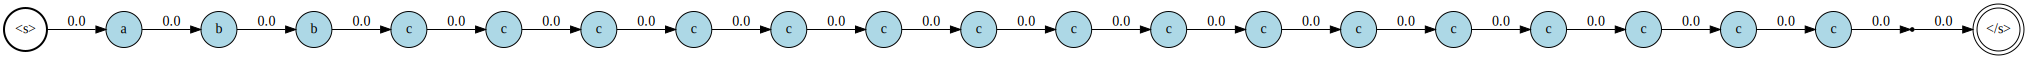

In [7]:
bestpath(fsm, llh)

In [390]:
paths = union(samplepath(fsm, llh, size = 10)...) |> 

LoadError: MethodError: no method matching αrecursion(::FSM{Float64}, ::Array{Float64,2}, ::MarkovModels.NoPruning)
Closest candidates are:
  αrecursion(::MarkovModels.AbstractFSM, ::AbstractArray{T,2}; pruning) where T<:AbstractFloat at /home/lucas/GithubRepositories/MarkovModels/src/inference.jl:13

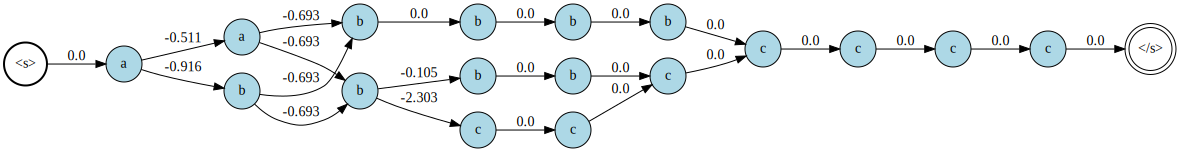

In [385]:
paths = union(samplepath(fsm, llh, size = 10)...) |> minimize